#### The script contains:

#### 1. Import Libraries & Data

#### 2. Explore Data Visually using Scatterplot

#### 3. State Hypothesis

#### 4. Reshape the variables into NumPy arrays

#### 5. Split the data into two sets: a training set and a test set

#### 6. Run a linear regression on the training data

#### 7. Create a plot that shows regression line on the test set

#### 8. Interpretation of how well the line appears to fit the data in a markdown cell

#### 9. Check the model performance statistics—MSE and R2 score

#### 10. Compare the predicted y values with the actual y values in a dataframe

#### 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import data

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 exercise/Gun Violence Analysis'

df = pd.read_csv (os.path.join(path,'02. Data', 'Prepared Data', 'gun_violence_data_wrangled.csv'), index_col = False)
df

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,...,NaN,0,4,5,0,0,3,1,4,1
1,1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,...,NaN,1,3,4,0,0,1,0,4,1
2,2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,...,2.0,1,3,5,0,0,5,0,3,2
3,3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,...,NaN,4,0,4,0,0,3,1,3,1
4,4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,...,2.0,2,2,3,1,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018-03-31,Saturday,31,3,2018,Louisiana,Rayne,North Riceland Road and Highway 90,...,1.0,0,0,1,0,0,0,1,0,1
239673,239673,1083139,2018-03-31,Saturday,31,3,2018,Louisiana,Natchitoches,247 Keyser Ave,...,1.0,1,0,2,0,0,2,0,1,1
239674,239674,1083151,2018-03-31,Saturday,31,3,2018,Louisiana,Gretna,1300 block of Cook Street,...,1.0,0,1,1,0,0,1,0,1,0
239675,239675,1082514,2018-03-31,Saturday,31,3,2018,Texas,Houston,12630 Ashford Point Dr,...,1.0,1,0,1,0,0,1,0,1,0


In [4]:
pd.set_option('display.max_columns', None)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,latitude,longitude,incident_event,incident_shot,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,40.3467,-79.8559,Others,Shot - Wounded/Injured,NaN,0,4,5,0,0,3,1,4,1
1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,33.9090,-118.3330,Gang involvement,Shot - Dead,NaN,1,3,4,0,0,1,0,4,1
2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,41.4455,-82.1377,Bar/club incident,Shot - Dead,2.0,1,3,5,0,0,5,0,3,2
3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,39.6518,-104.8020,Drug involvement,Shot - Dead,NaN,4,0,4,0,0,3,1,3,1
4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,36.1140,-79.9569,Suicide,Shot - Dead,2.0,2,2,3,1,0,2,2,3,1


#### 2. Exploring Data Visually using Scatterplot

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


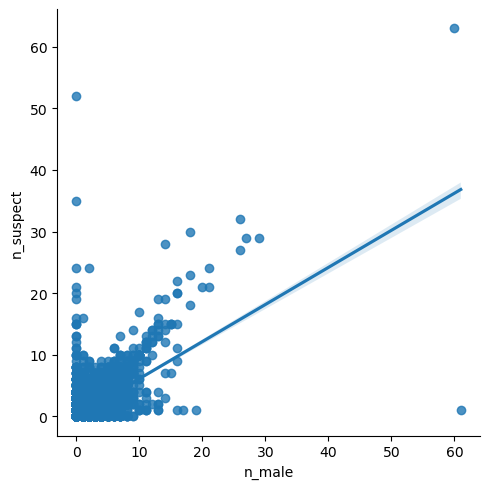

In [9]:
# Create a scatterplot for the "n_male" and "n_suspect" columns

scatterplot_1 = sns.lmplot(x = 'n_male', y = 'n_suspect', data = df)

#### 3. State Hypothesis

##### Most of the suspects in a gun violence incidents tend to be adult male

#### 4. Reshape the variables into NumPy arrays

In [11]:
# Reshaping variables with X being the independent variable and y being the dependent variable

X = df['n_suspect'].values.reshape(-1,1)
y = df['n_male'].values.reshape(-1,1)

In [12]:
X

array([[1],
       [1],
       [2],
       ...,
       [0],
       [0],
       [1]])

In [13]:
y

array([[3],
       [1],
       [5],
       ...,
       [1],
       [1],
       [1]])

#### 5. Split the data into two sets: a training set and a test set

In [14]:
# Spliting data into: a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 6. Run a linear regression on the data.

##### First, fit the model you created to the training set.

In [35]:
# create linear regression object
regression = LinearRegression()

# fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted_train = regression.predict(X_train)

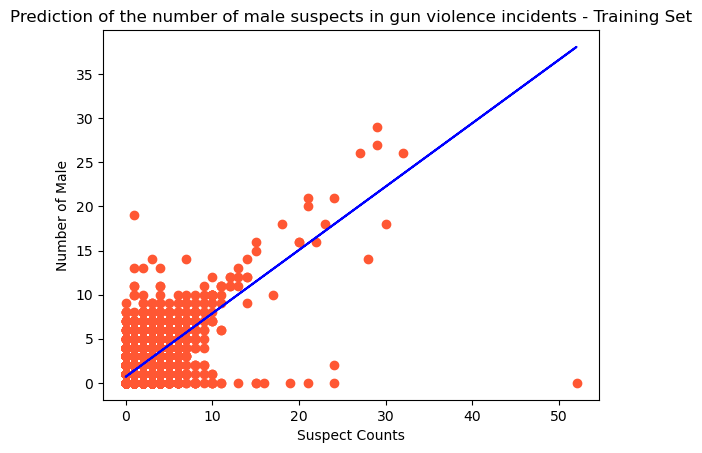

In [37]:
# Creating visualisation for the result of training set

plot_train = plt
plot_train.scatter(X_train, y_train, color='#FF5733')
plot_train.plot(X_train, y_predicted_train, color='blue')
plot_train.title('Prediction of the number of male suspects in gun violence incidents - Training Set')
plot_train.xlabel('Suspect Counts')
plot_train.ylabel('Number of Male')
plot_train.show()

#### 7. Create a plot that shows regression line on the test set

In [38]:
# Predict the values of y using X.

y_predicted_test = regression.predict(X_test)

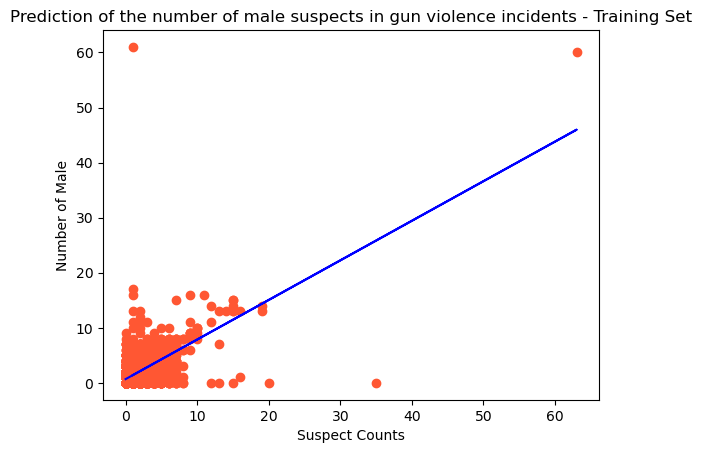

In [39]:
# Creating visualisation for the result of test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='#FF5733')
plot_test.plot(X_test, y_predicted_test, color='blue')
plot_test.title('Prediction of the number of male suspects in gun violence incidents - Training Set')
plot_test.xlabel('Suspect Counts')
plot_test.ylabel('Number of Male')
plot_test.show()

#### 8. Interpretation of how well the line appears to fit the data in a markdown cell

##### The line appears to be similar between the training and test results, both seems to have a positive relationship. However in the test set, we can see that it predicts some outlier data points

#### 9. Check the model performance statistics—MSE and R2 score

In [48]:
# Creating objects for the model summary statistics

rmse = mean_squared_error(y_test, y_predicted_test) 
r2 = r2_score(y_test, y_predicted_test)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.71869251]]
Mean squared error:  0.6790533882784029
R2 score:  0.4330561888048817


#### The MSE is quite small which means that the regression line passes fairly close to all the observations, making it quite a good fit. However based on the R2 score, it shows that this result is only 43% accurate, showing it is a poor fit model

#### 10. Compare the predicted y values with the actual y values in a dataframe

In [50]:
# Created a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data.head(20)

,Actual,Predicted
0,0,0.690846
1,2,1.409538
2,0,0.690846
3,1,0.690846
4,2,2.128231
5,1,1.409538
6,4,2.846924
7,2,1.409538
8,1,1.409538
9,2,1.409538


#### As we see above, the predicted values compared to actual values are quite different, which support the conclusion that the model is quite a poor fit.